## Camera callibration using blob detection

Test images would not be loaded in the repository since each image is ~13mb. You can find those images here https://drive.google.com/file/d/127fwNOLlXjX0Acp_kgTTH0UcdGa7Sw0R/view?usp=sharing

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
# Termination criteria
criteria = (cv2. TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

########################################Blob Detector##############################################

# Setup SimpleBlobDetector parameters.
blobParams = cv2.SimpleBlobDetector_Params()

# Change thresholds
blobParams.minThreshold = 150
blobParams.maxThreshold = 255

# Filter by Area
blobParams.filterByArea = True
blobParams.minArea = 4500   # minArea may be adjusted to suit for your experiment
# Some of the points could be 750x750 px and other could be 400x400 px
blobParams.maxArea = 1750000   # maxArea may be adjusted to suit for your experiment

# Filter by Circularity
blobParams.filterByCircularity = True
blobParams.minCircularity = 0.4

# Filter by Convexity
blobParams.filterByConvexity = True
blobParams.minConvexity = 0.87

# Filter by Inertia
blobParams.filterByInertia = True
blobParams.minInertiaRatio = 0.01

# Create a detector with the parameters
blobDetector = cv2.SimpleBlobDetector_create(blobParams)

In [3]:
objp = np.zeros((44, 3), np.float32)
for x in range(0, 11):
  for y in range(0, 4):
    objp[4*x+y] = (x*36, y*72 + (x%2)*36, 0)

In [4]:
work_dir = os.getcwd()
print("Working directory %s" % work_dir)

Working directory /Users/olehmisko/Desktop/UCU docs/Computer-Vision-2019/computer-vision-hw/cv-4-0


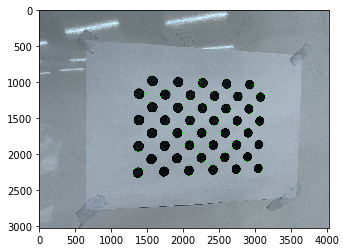

40
Skip img-01.jpg


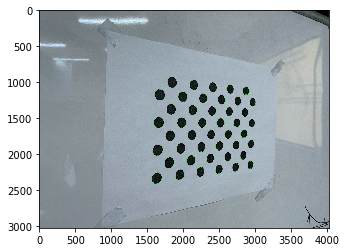

44


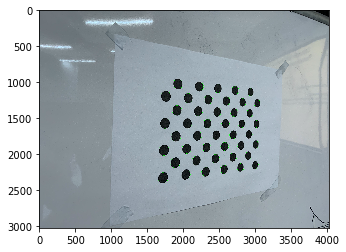

44


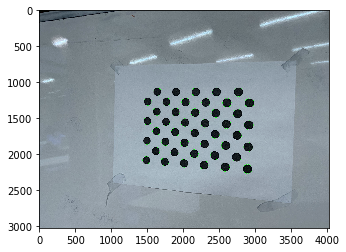

43
Skip img-04.jpg


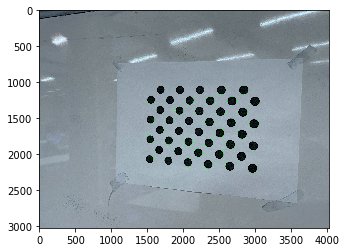

41
Skip img-05.jpg


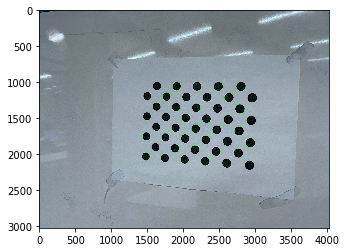

43
Skip img-06.jpg


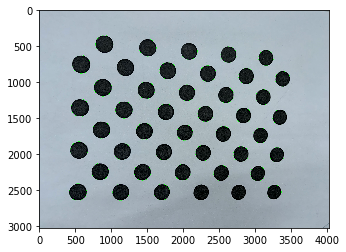

42
Skip img-07.jpg


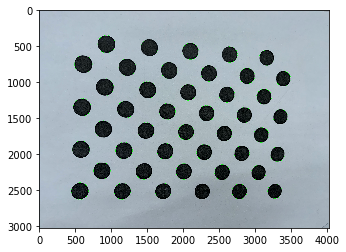

43
Skip img-08.jpg


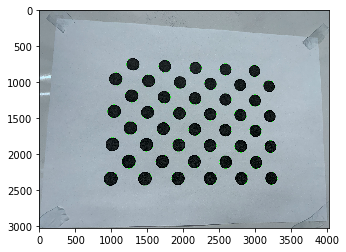

44


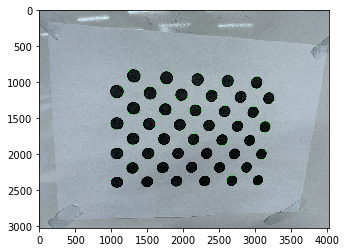

35
Skip img-10.jpg


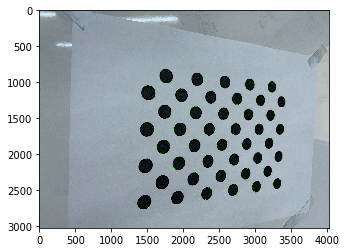

40
Skip img-11.jpg


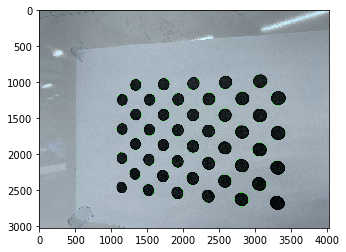

43
Skip img-12.jpg


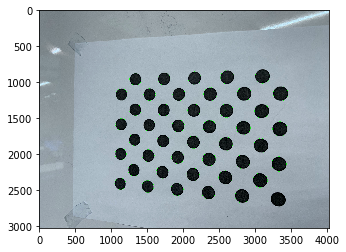

43
Skip img-13.jpg


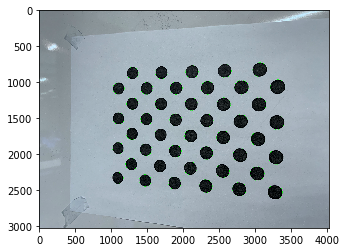

44


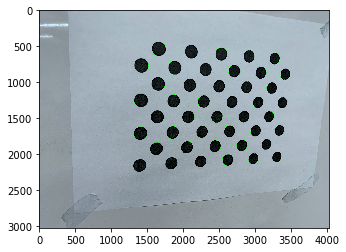

42
Skip img-15.jpg


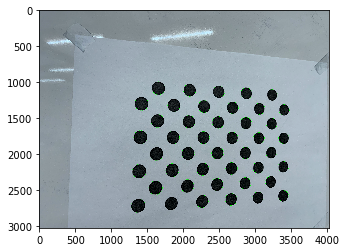

43
Skip img-16.jpg


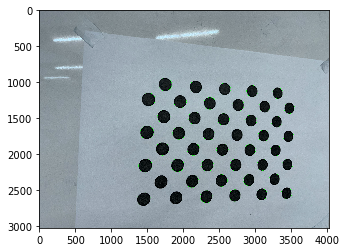

42
Skip img-17.jpg


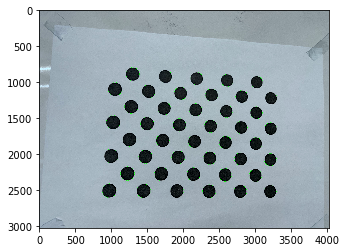

44


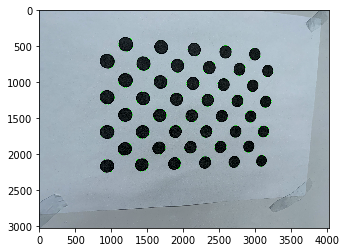

44


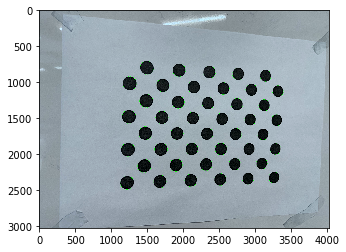

44


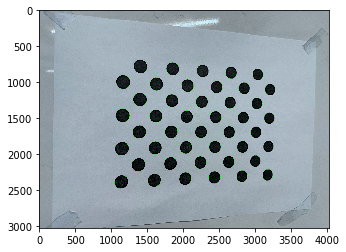

44


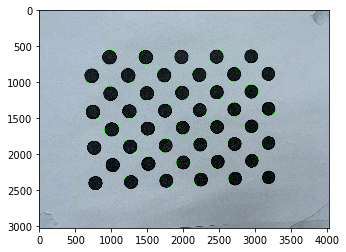

44
(9, 44, 3)
(9, 44, 1, 2)
(9, 44, 2)
[[3.14498681e+03 0.00000000e+00 2.02547110e+03]
 [0.00000000e+00 3.15388510e+03 1.47328160e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 2.88617833e-01 -1.67977228e+00  1.09453063e-03  2.54429976e-04
   2.98361961e+00]]


In [5]:
objpoints = None # 3d point in real world space
imgpoints = None # 2d points in image plane.
for f in range(1,23):
    img = cv2.imread("/Users/olehmisko/Desktop/UCU docs/Computer-Vision-2019/computer-vision-hw/cv-4-0/data/%s.png" % f)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    keypoints = blobDetector.detect(gray)
    im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    ret, corners = cv2.findCirclesGrid(gray, (4,11),
                        flags = cv2.CALIB_CB_ASYMMETRIC_GRID + cv2.CALIB_CB_CLUSTERING,
                                     blobDetector = blobDetector)   # Find the circle grid
    plt.imshow(im_with_keypoints)
    plt.show()
    
    print(len(keypoints))
    
    if corners is not None and ret:
        objpoints = np.array([objp]) if objpoints is None else np.append(objpoints, [objp], axis = 0)
        imgpoints = np.array([corners]) if imgpoints is None else np.append(imgpoints, [corners], axis = 0)
    else:
        print("Skip img-%02d.jpg" % f)


print(objpoints.shape)
print(imgpoints.shape)
(i1, i2, i3, i4) = imgpoints.shape;
imgpoints = imgpoints.reshape([i1, i2, i4])
print(imgpoints.shape)
  
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print(mtx)
print(dist)

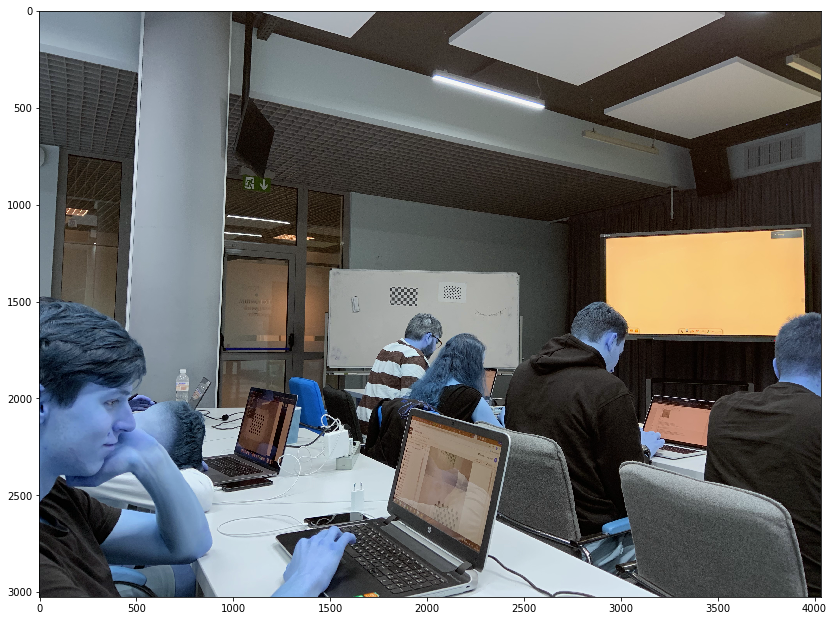

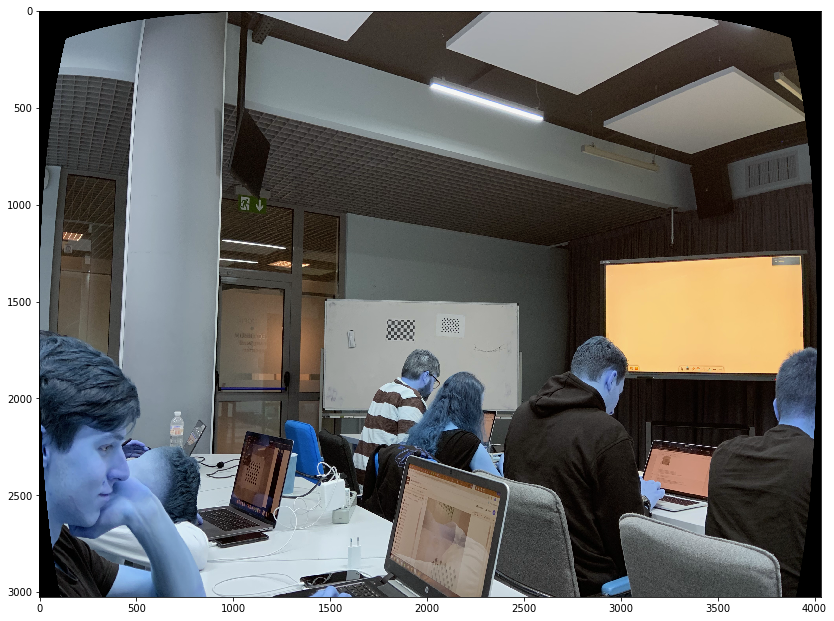

In [6]:
test = cv2.imread("/Users/olehmisko/Desktop/UCU docs/Computer-Vision-2019/computer-vision-hw/cv-4-0/data/test_1.png")

(w,h) = test.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
dst = cv2.undistort(test, mtx, dist, None, newcameramtx)

plt.figure(figsize=(14,12))
plt.imshow(test)
plt.show()
plt.figure(figsize=(14,12))
plt.imshow(dst)
plt.show()

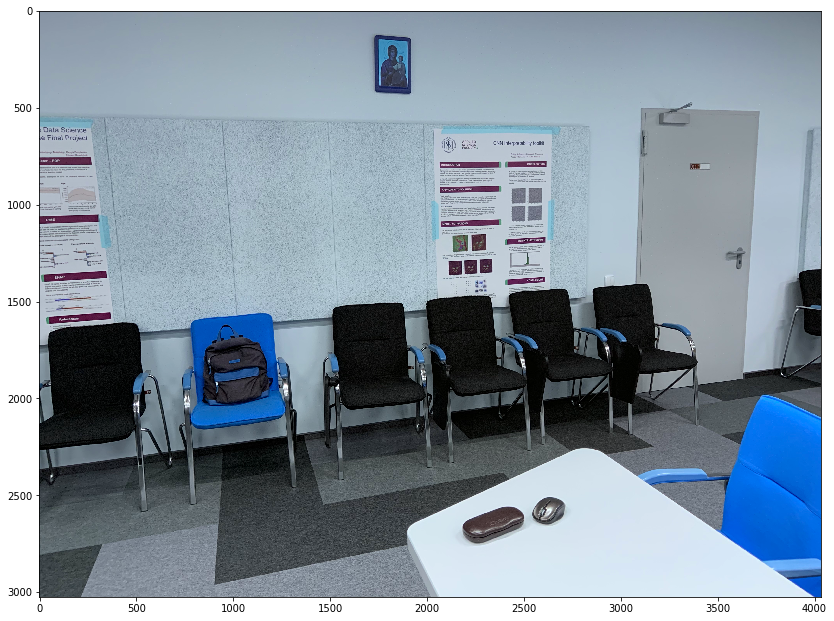

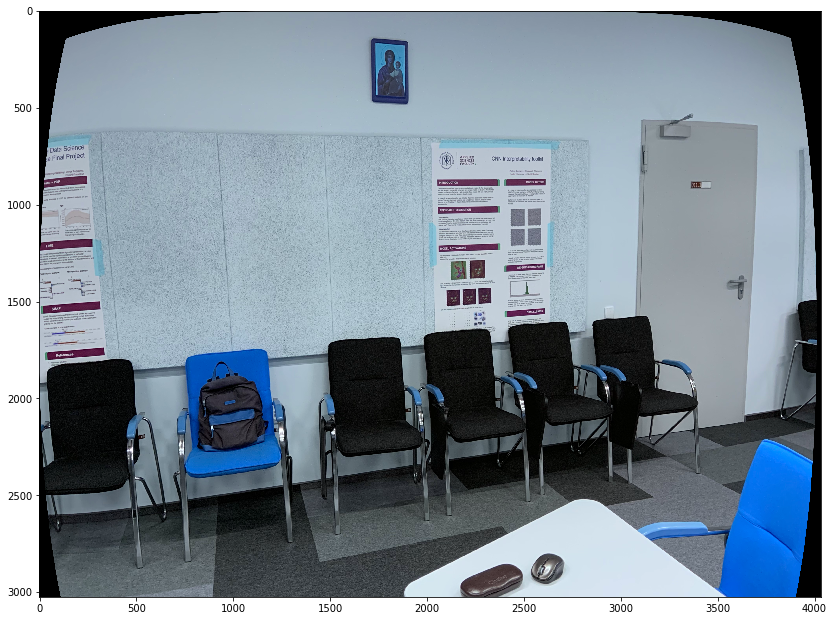

In [7]:
test = cv2.imread("/Users/olehmisko/Desktop/UCU docs/Computer-Vision-2019/computer-vision-hw/cv-4-0/data/test_2.png")

(w,h) = test.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
dst = cv2.undistort(test, mtx, dist, None, newcameramtx)

plt.figure(figsize=(14,12))
plt.imshow(test)
plt.show()
plt.figure(figsize=(14,12))
plt.imshow(dst)
plt.show()